## **Marketing Data Analysis**

### Q.1. Import necessary libraries and load the dataset and display random 5 samples. Check the info of the data and write your findings.

- **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

- **Load the dataset**

In [2]:
d = pd.read_csv("marketing_data.csv") #reading the provided dataset (marketing_data.csv)
d

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


- **Display random 5 samples**

In [3]:
d.sample(5) #random 5 samples of the dataframe

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
800,1859,1972,Master,Married,"$75,251.00",0,0,8/27/12,34,721,...,5,5,0,0,0,0,0,1,0,GER
1097,89,1975,2n Cycle,Married,"$22,212.00",1,0,12/9/13,49,5,...,4,6,0,0,0,0,0,0,0,SA
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
1351,4518,1979,Graduation,Together,"$85,693.00",0,1,4/20/13,59,386,...,11,5,0,0,0,0,0,0,0,CA
528,5872,1951,Graduation,Single,"$60,689.00",0,1,6/1/13,23,240,...,10,3,0,0,0,0,0,0,0,US


- **Check the info of the data**

In [4]:
d.info() #information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

- **Findings from the given dataset**

Datatype of all the features are in either integer type or object type, We need to remove unwanted characters in the data and convert the datatypes to there suitable datatypes.

'Income' Column - has null values and has special characters. It is required to remove the unwanted characters and convert it in a suitable datatype.

### Q.2. Check the following using an appropriate method and write your findings (1 point) 
### i) Check how spread out or varied your data set is.
### ii) Check where the middle 50% of your data lies.
### iii) Check boundaries for the lower, middle and upper quarters of data.

In [5]:
d.describe() #displays statistical summary of the entire dataset

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**From the statistical summary it can be inferred that the dataset is right-skewed**

# Question 4 is done before Question 3 because without handling the special characters in the respective columns it was not possible to handle the missing values 

### Q.4. Check for any presence of special characters in any variables. If present, clean/replace and change the datatype of the variable if required.

In [6]:
df = d.copy() #taking a copy of the dataframe
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [7]:
len(df[df.duplicated()]) #checking for any duplicate rows

0

In [8]:
df.columns = df.columns.str.replace(' ', '') #Removing space from column name

**Income column can be made numeric by removing commas, dollar sign from the values**
- Handling Income column

In [9]:
# Replacing comma and '$'
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','')
# Converting feature 'Income' as float
df['Income'] = df['Income'].astype(float).round(2)
df.info() #Displays changed datatype of 'Income' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df #Displaying the dataset with the clean 'Income' column

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


### Q.3. Check for any missing values in the dataset and handle them using an appropriate method.

- **Checking for any missing values**

In [11]:
df.isnull().sum() # Checking null values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

- **Handling missing value in \'Income\' column by imputation technique**

In [12]:
imputer = KNNImputer(n_neighbors=2) # KNN imputation technique to handle missing values in column 'Income'
df.iloc[:,[4]] = imputer.fit_transform(df.iloc[:,[4]])

In [13]:
df.isnull().sum() #Displays that all null values in column 'Income' have been handled.Hence the sum of null values in column 'Income' is 0


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

### Q.5. The Marketing Manager wants to know the 'Age' of the customers. Extract the feature age from the given dataset and display the statistical summary of the age?

- **Extract the feature age from the given dataset**

In [14]:
import datetime
df['age'] = datetime.datetime.now().year - df['Year_Birth'] #Age is calculated by subtracting the year of birth(second operand) from the current year(first operand)
df #Displaying the dataset with the new column 'age'


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,52
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,61
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,64
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,7,0,0,0,0,0,0,0,AUS,55
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,7,1,0,0,0,0,1,0,SP,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,4,0,0,0,0,0,0,0,US,46
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,8,0,0,0,0,0,0,0,SP,45
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,8,0,0,0,0,0,0,0,SP,46
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,3,0,0,0,0,0,0,0,IND,44


- **Display the statistical summary of the age**

In [15]:
df['age'].describe() #statistical summary of feature 'Age'

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: age, dtype: float64

### Q.6. The Marketing manager wants to understand the total amount spent on various products so that we can find what percentage of the amount is spent on which product.
### a. Find out the total amount spent by a customer.
### b. Display the Percentage of the amount spent on Wines and other products.


- **The total amount spent by a customer.**

In [16]:
len(df.index) #displays the total number of rows

2240

In [17]:
df['ID'].nunique() #displays number of customer IDs 

2240

#### From the above two lines of code it is evident that the total number of rows is equal to the total number of customer ID.
#### Since none of the customer IDs are repeating, so adding the individual values in columns 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds' will give the total amount spent by a customer. Each row represents a unique customer.

In [18]:
df['total_amount'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds'] #adding new column named as 'total_amount' in the dataset
df.sort_values(by='ID',ascending=True) #displaying the dataset with the new column 'total_amount'


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,total_amount
1503,0,1985,Graduation,Married,70951.0,0,0,5/4/13,66,239,...,0,0,0,0,0,0,0,SA,37,1198
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,0,1,1,0,CA,61,577
1956,9,1975,Master,Single,46098.0,1,1,8/18/12,86,57,...,0,0,0,0,0,0,0,CA,47,120
1311,13,1947,PhD,Widow,25358.0,0,1,7/22/13,57,19,...,0,0,0,0,0,0,0,SA,75,32
1834,17,1971,PhD,Married,60491.0,0,1,9/6/13,81,637,...,0,0,0,0,0,0,0,SP,51,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,11178,1972,Master,Single,42394.0,1,0,3/23/14,69,15,...,0,0,0,0,0,0,0,GER,50,32
1925,11181,1949,PhD,Married,156924.0,0,0,8/29/13,85,2,...,0,0,0,0,0,0,0,CA,73,8
529,11187,1978,Basic,Single,26487.0,1,0,5/20/13,23,2,...,0,0,0,0,0,0,0,CA,44,69
1897,11188,1957,Graduation,Together,26091.0,1,1,2/25/14,84,15,...,0,0,0,0,0,0,0,SP,65,89


- **Display the Percentage of the amount spent on Wines and other products.**

In [19]:
#user-defined function to calculate percentage of the amount spent on Wines and other products.
def percent_amountspent(a,b):
    x = (a/b)*100
    return x

In [20]:
percent_amountspent(df['MntWines'],df['total_amount']) #displays the percentage of the amount spent on Wines

0       15.882353
1       80.415945
2       53.386454
3       90.909091
4        6.593407
          ...    
2235    53.991292
2236     9.090909
2237    59.870550
2238    19.305857
2239    15.677180
Length: 2240, dtype: float64

In [21]:
percent_amountspent(df['MntFruits'],df['total_amount']) #displays the percentage of the amount spent on Fruits

0        8.739496
1        0.866551
2        4.382470
3        0.000000
4       17.582418
          ...    
2235     2.612482
2236    18.181818
2237     0.647249
2238     2.747650
2239     2.226345
Length: 2240, dtype: float64

In [22]:
percent_amountspent(df['MntMeatProducts'],df['total_amount']) #displays the percentage of the amount spent on Meat

0       31.848739
1       11.091854
2       23.505976
3        9.090909
4       26.373626
          ...    
2235    18.287373
2236    23.636364
2237    28.478964
2238    50.686913
2239    51.298701
Length: 2240, dtype: float64

In [23]:
percent_amountspent(df['MntFishProducts'],df['total_amount']) #displays the percentage of the amount spent on Fish

0        9.327731
1        1.213172
2        5.976096
3        0.000000
4       12.087912
          ...    
2235     6.821480
2236     5.454545
2237     4.854369
2238    10.773680
2239    17.439703
Length: 2240, dtype: float64

In [24]:
percent_amountspent(df['MntSweetProducts'],df['total_amount']) #displays the percentage of the amount spent on Sweet

0       15.882353
1        0.000000
2        0.796813
3        0.000000
4        0.000000
          ...    
2235     6.966618
2236    14.545455
2237     1.618123
2238    11.930586
2239     0.000000
Length: 2240, dtype: float64

In [25]:
percent_amountspent(df['MntGoldProds'],df['total_amount']) #displays the percentage of the amount spent on Gold

0       18.319328
1        6.412478
2       11.952191
3        0.000000
4       37.362637
          ...    
2235    11.320755
2236    29.090909
2237     4.530744
2238     4.555315
2239    13.358071
Length: 2240, dtype: float64

### Q.7. Being an Analyst understands the total number of purchases made through different channels which can help find the percentage these channels contribute.
### a. Find out the total purchases done by a customer through different channels.
### b. Display the percentage of the store and other channels’ contribution to the total purchases.


- **Total purchases done by a customer through different channels**

In [26]:
len(df.index) #displays the total number of rows

2240

In [27]:
df['ID'].nunique() #displays number of customer IDs 

2240

#### From the above two lines of code it is evident that the total number of rows is equal to the total number of customer ID.
#### Since none of the customer IDs are repeating, so adding the individual values in columns 'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases' will give the total purchases done by a customer. Each row represents a unique customer.

In [28]:
df['total_purchase'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases'] #adding new column named as 'total_purchase' in the dataset
df.sort_values(by='ID',ascending=True) #displaying the dataset with the new column 'total_purchase'


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,total_amount,total_purchase
1503,0,1985,Graduation,Married,70951.0,0,0,5/4/13,66,239,...,0,0,0,0,0,0,SA,37,1198,17
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,1,1,0,CA,61,577,18
1956,9,1975,Master,Single,46098.0,1,1,8/18/12,86,57,...,0,0,0,0,0,0,CA,47,120,11
1311,13,1947,PhD,Widow,25358.0,0,1,7/22/13,57,19,...,0,0,0,0,0,0,SA,75,32,6
1834,17,1971,PhD,Married,60491.0,0,1,9/6/13,81,637,...,0,0,0,0,0,0,SP,51,1028,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,11178,1972,Master,Single,42394.0,1,0,3/23/14,69,15,...,0,0,0,0,0,0,GER,50,32,5
1925,11181,1949,PhD,Married,156924.0,0,0,8/29/13,85,2,...,0,0,0,0,0,0,CA,73,8,0
529,11187,1978,Basic,Single,26487.0,1,0,5/20/13,23,2,...,0,0,0,0,0,0,CA,44,69,9
1897,11188,1957,Graduation,Together,26091.0,1,1,2/25/14,84,15,...,0,0,0,0,0,0,SP,65,89,9


- **Display the percentage of the store and other channels’ contribution to the total purchases.**

In [29]:
#user-defined function to calculate percentage of the store and other channels’ contribution to the total purchases.
def percent_purchases(a,b):
    x = (a/b)*100
    return x

In [30]:
percent_purchases(df['NumDealsPurchases'],df['total_purchase']) #displays the percentage of the purchases made with a discount


0        6.666667
1        5.555556
2        9.090909
3       25.000000
4       25.000000
          ...    
2235    10.000000
2236    20.000000
2237    14.285714
2238     5.000000
2239     5.555556
Length: 2240, dtype: float64

In [31]:
percent_purchases(df['NumWebPurchases'],df['total_purchase']) #displays the percentage of the purchases made through the company's web site


0       26.666667
1       38.888889
2       27.272727
3       25.000000
4       37.500000
          ...    
2235    25.000000
2236    20.000000
2237    42.857143
2238    25.000000
2239    44.444444
Length: 2240, dtype: float64

In [32]:
percent_purchases(df['NumCatalogPurchases'],df['total_purchase']) #displays the percentage of the purchases made using a catalogue


0       26.666667
1       16.666667
2       18.181818
3        0.000000
4       12.500000
          ...    
2235    10.000000
2236     0.000000
2237     7.142857
2238    20.000000
2239    27.777778
Length: 2240, dtype: float64

In [33]:
percent_purchases(df['NumStorePurchases'],df['total_purchase']) #displays the percentage of the purchases made directly in stores


0       40.000000
1       38.888889
2       45.454545
3       50.000000
4       25.000000
          ...    
2235    55.000000
2236    60.000000
2237    35.714286
2238    50.000000
2239    22.222222
Length: 2240, dtype: float64

### Q.8. The marketing manager wants to understand the performance of different marketing campaigns. Find out which marketing campaign is most successful? Use suitable graphs for visualization. (Hint:- use features like AcceptedCmp for campaign information)

In [34]:
# Libraries to deal with data
import pandas as pd
import numpy as np

# Libraries used for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

<Figure size 1080x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7fbdf9fbc250>,
 [Text(0.48241522809338594, 0.988572479742182, 'AcceptedCmp3'),
  Text(-0.9804858546091316, 0.4986456546601014, 'AcceptedCmp4'),
  Text(-0.514740573135814, -0.9721327802146238, 'AcceptedCmp5'),
  Text(0.9004890321116226, -0.6317590545822619, 'AcceptedCmp1'),
  Text(1.076343861651573, 0.2269006202833736, 'AcceptedCmp2')],
 [Text(0.26313557896002865, 0.5392213525866446, '24.4%'),
  Text(-0.5348104661504354, 0.27198853890550984, '25.0%'),
  Text(-0.28076758534680757, -0.5302542437534311, '24.4%'),
  Text(0.4911758356972486, -0.34459584795396103, '21.6%'),
  Text(0.5870966518099489, 0.12376397470002196, '4.5%')])

Text(0.5, 1.0, 'Performance of different marketing campaigns')

(-1.1081698540357665,
 1.1139553322700975,
 -1.1357997984489852,
 1.1343081093993195)

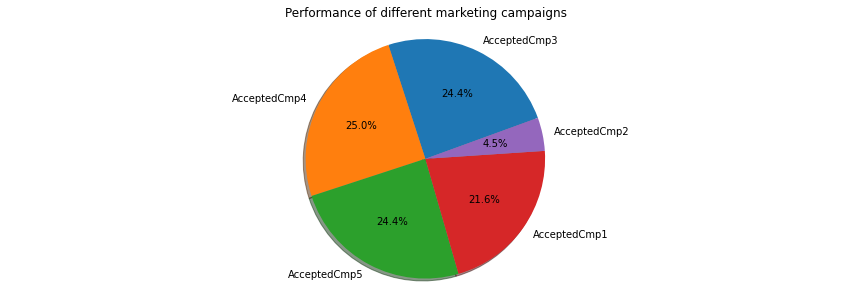

In [35]:
x = df.filter(regex='Cmp').sum() #filtering out the AcceptedCmp columns for campaign information
x #displays the total number of accepted campaigns per individual campaign type

#labels for each portion of the pie
my_labels = 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'

# figure size in inches
plt.figure(figsize=(15,5))

#putting the pie chart together from the variables created above
plt.pie(x,labels=my_labels,autopct='%1.1f%%', startangle=20, shadow = True) 

plt.title('Performance of different marketing campaigns') #assigned title of pie chart
plt.axis('equal') #scaling both axes equally for a perfectly round pie chart

#displays the pie chart
plt.show()

**From the pie chart , it can be inferred that the 4th campaign was most successful**

### Q.9. The marketing manager wants to understand which products are performing the best and which are performing the least in terms of revenue. Being an analyst, analyse the data and plot a suitable graph to display a report on revenue generated by different products.

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

<Figure size 1080x360 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fbdf958d490>,
 [Text(0, 0, 'Wines'),
  Text(1, 0, 'Fruits'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fish'),
  Text(4, 0, 'Sweet'),
  Text(5, 0, 'Gold')])

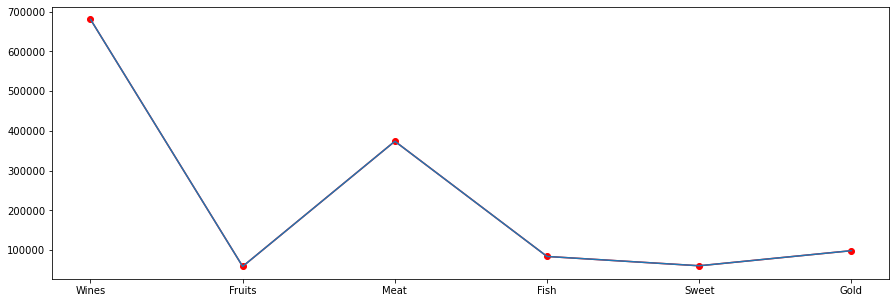

In [36]:
y = df.filter(regex='Mnt').sum() #filtering out the products column for information about their performance
y #displays the total amount spent on different products

# figure size in inches
plt.figure(figsize=(15,5))

# draw the plot to display a report on revenue generated by different products.
plt.plot(y,color='red', marker= 'o')

# set labels for each of these persons
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Wines', 'Fruits', 'Meat', 'Fish' , 'Sweet' , 'Gold']);

plt.plot(y) #plotting the graph

**Wines are performing the best and Fruits are performing the least in terms of revenue**

### Q.10. The team wants to understand if there’s any pattern between the age of customers and the last campaign acceptance rate. Plot a suitable graph to visualize the distribution of the age with respect to customers who accepted the last campaign.

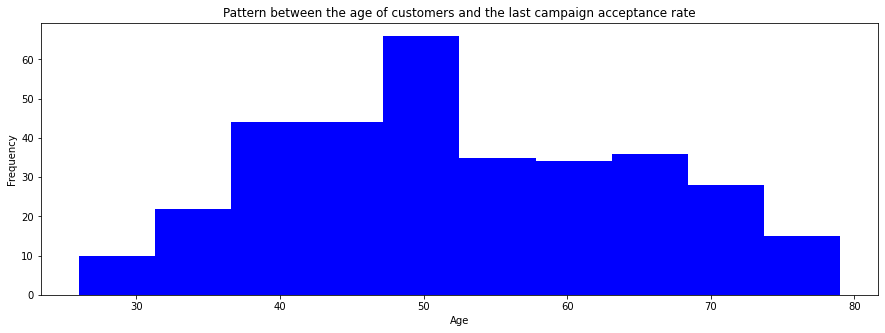

In [37]:
g = df[df['Response']==1] #filtering out rows where customers accepted the last campaign

# figure size in inches
plt.figure(figsize=(15,5))

# title
plt.title('Pattern between the age of customers and the last campaign acceptance rate')

# xlabel
plt.xlabel('Age')

# ylabel
plt.ylabel('Frequency')

# plot histogram
plt.hist(g['age'], color='blue');

### Q.11. The Chief Marketing specialist wants to visually see which Country has the most number of customers who accepted the last campaign. What is your approach?

<Figure size 1080x360 with 0 Axes>

[Text(0.5, 1.0, 'Pattern between Country and the last campaign acceptance rate')]

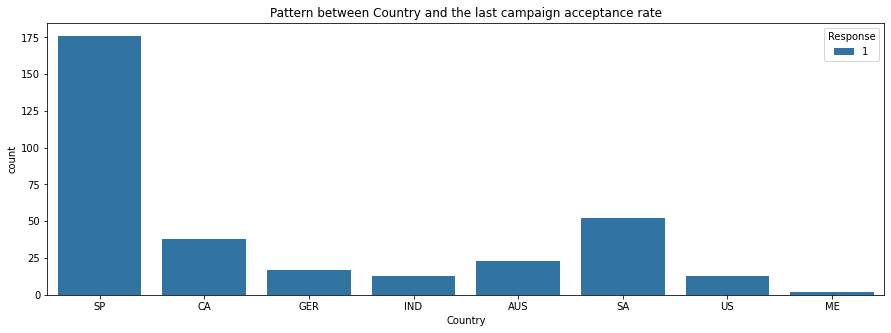

In [38]:
c = df[df['Response']==1] #filtering out rows where customers accepted the last campaign

# figure size in inches
plt.figure(figsize=(15,5))

# count plot to display the countries according to the number of customers who accepted the last campaign
sns.countplot(x ='Country', hue = "Response", data = c).set(title='Pattern between Country and the last campaign acceptance rate')


**From the graph plotted above , it can be inferred that country SP has the most number of customers who accepted the last campaign**

### Q.12. Analyse visually and write your inferences about the relationship between the following:- (1 point )
### i) Total amount spent Vs Dependents. (Dependents=['Kidhome']+['Teenhome'])
### ii) Total Purchases Vs Dependents.

In [39]:
df['Dependents'] = df['Kidhome']+df['Teenhome'] #Adding new column named as 'Dependents' in the dataset
df #displaying the dataset with the new column 'Dependents'

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,total_amount,total_purchase,Dependents
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,1,0,SP,52,1190,15,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,1,1,0,CA,61,577,18,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,US,64,251,11,1
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,AUS,55,11,4,2
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,0,0,1,0,SP,33,91,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,0,0,0,0,0,US,46,689,20,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,0,0,0,0,0,SP,45,55,5,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,0,0,0,0,0,SP,46,309,14,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,0,0,0,0,0,IND,44,1383,20,0


-  **Total amount spent Vs Dependents. (Dependents=['Kidhome']+['Teenhome'])**

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='Dependents', ylabel='total_amount'>

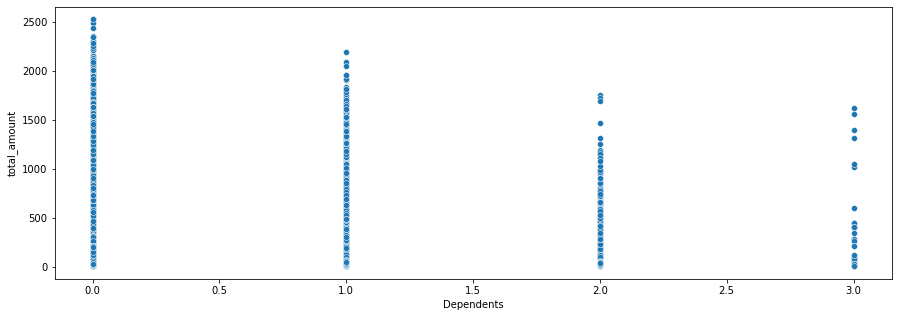

In [40]:
# figure size in inches
plt.figure(figsize=(15,5))

# scatterplot to display a relationship between total amount spent and dependents
sns.scatterplot(x=df["Dependents"], y=df["total_amount"], data=df)

 **From the above plot , it can be inferred that customers with 0 dependents spent most of the amount. Whereas customers with 3 dependents spent the least.**

- **Total Purchases Vs Dependents.**

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='Dependents', ylabel='total_purchase'>

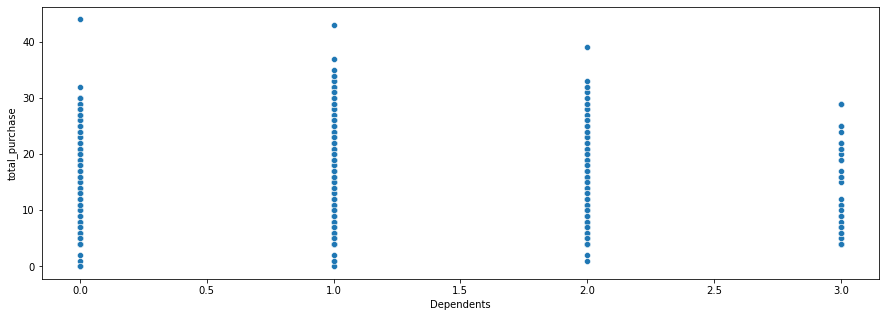

In [41]:
# figure size in inches
plt.figure(figsize=(15,5))

# scatterplot to display a relationship between total purchase and dependents
sns.scatterplot(x=df["Dependents"], y=df["total_purchase"], data=df)

**From the above plot , it can be inferred that customers with 1 dependent did most of the purchases. Whereas customers with 3 dependents made the least purchase.**

### Q.13. Perform Correlation Analysis and write your key inferences. (Hint:- visualise using an appropriate plot)

Text(0.5, 1, 'Correlation Analysis')

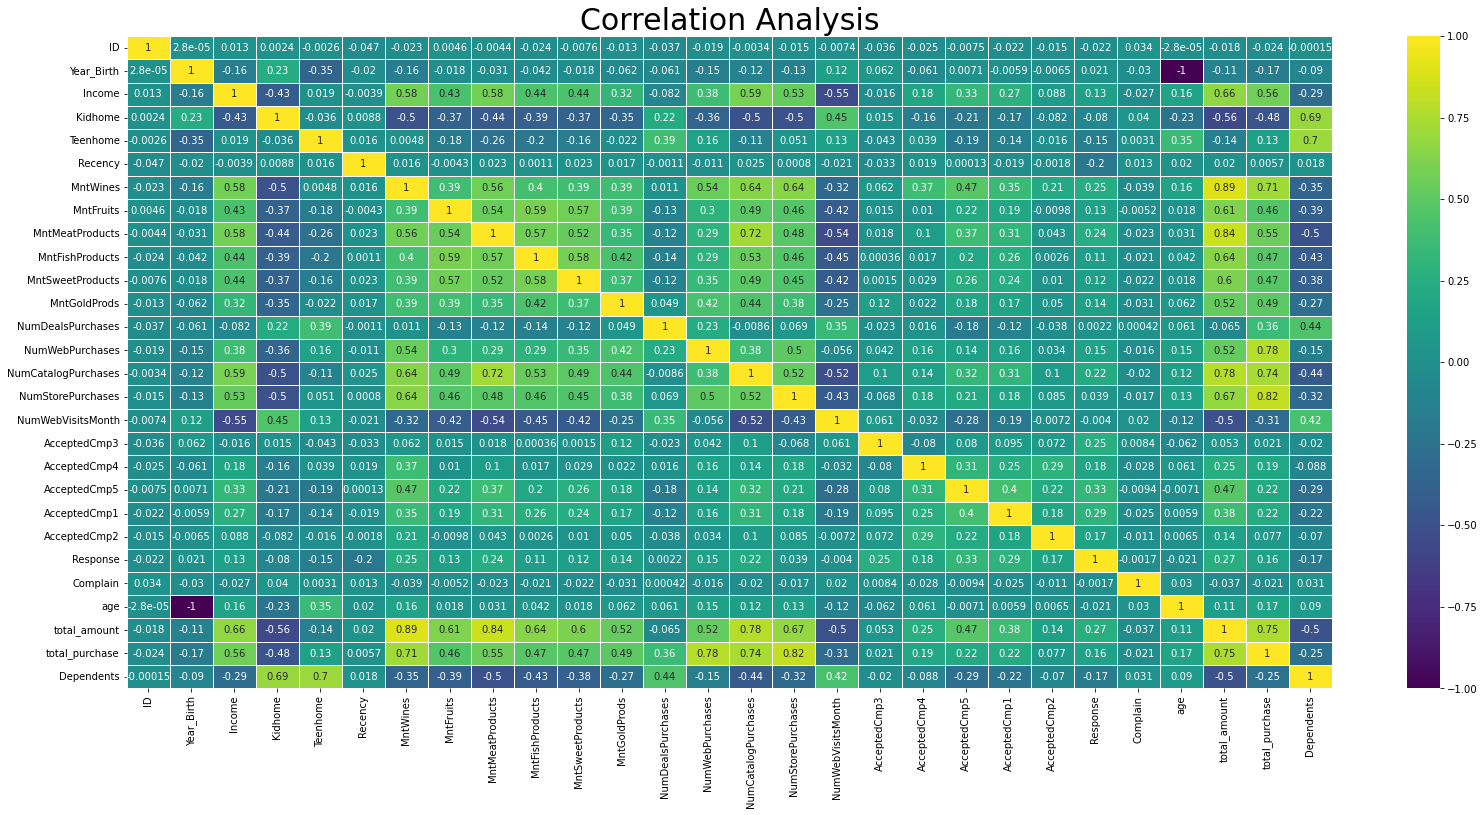

In [46]:
# figure size in inches
fig, ax = plt.subplots(figsize=(27,12))

#Title 
plt.title('Correlation Analysis',y=1,size=30)

# setting the parameter values
annot = True

#plotting the heatmap to perform the correlation analysis
ax = sns.heatmap(df.corr(),cmap='viridis', annot=True, linewidths=.5)

**From the correlation analysis,it can be inferred that the total amount spent by a customer has a high correlation with the amount spent on wines.**

**Whereas , the correlation between age and the year of birth of the customers is very low as seen from the analysis.**

### Q.14. Understand the Education background of the customers who complained in the last 2 years. State the Education background of the customers who have registered the most number of complaints. (Hint:- you can use appropriate)

<Figure size 1080x360 with 0 Axes>

[Text(0.5, 1.0, 'Pattern between Education background of customers and the number of complaints registered by them')]

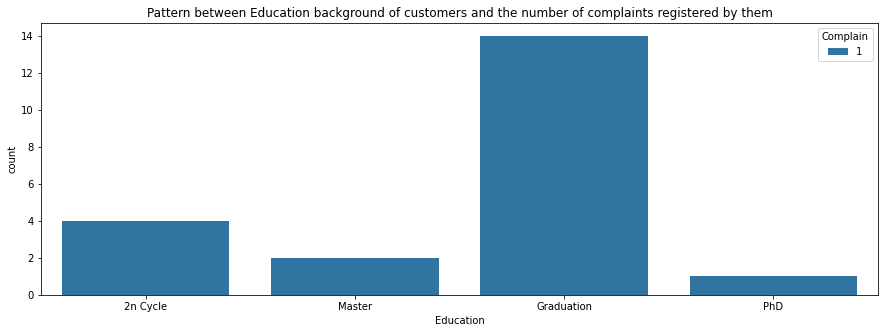

In [47]:
e = df[df['Complain']==1] #filtering out rows where customers complained in the last 2 years

# figure size in inches
plt.figure(figsize=(15,5))

# count plot to display the education background of the customers who complained in the last 2 years
sns.countplot(x ='Education', hue = "Complain", data = e).set(title='Pattern between Education background of customers and the number of complaints registered by them')


**Customers with Graduation as their education background have registered the most number of complaints.**

### Q.15.Use features 'Total_amount_spent', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts' and, 'MntGoldProds' in x-axis and y-axis and plot the following plots. (2 points)
### i) Plot a pairplot with hue as Response.
### ii) Plot a pairplot with hue as Education.
### iii) Plot a pairplot with hue as Marital Status and write your key observations.

- **Plot a pairplot with hue as Response**

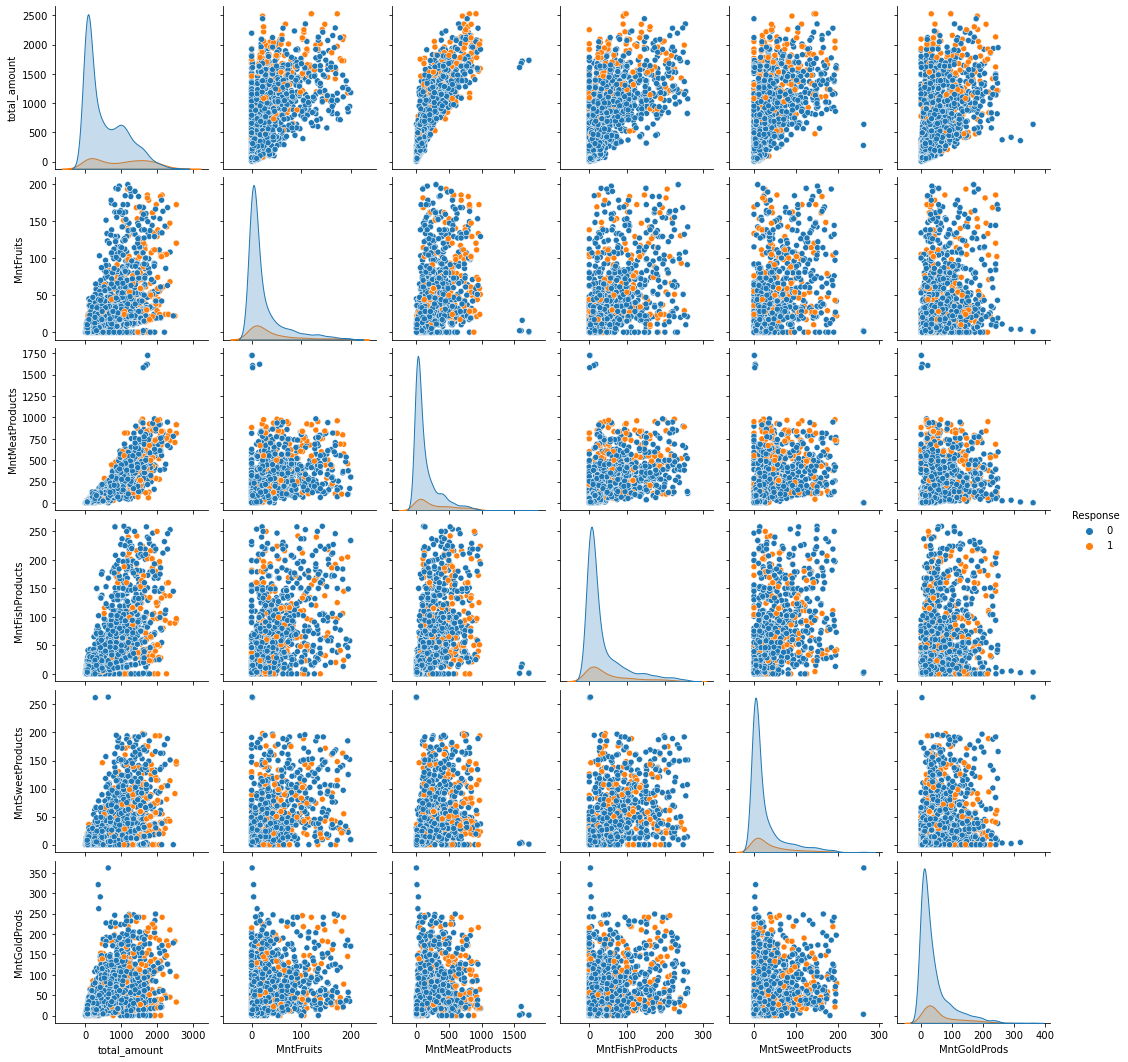

In [48]:
#Plotting a pairplot with the features 'total_amount', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts' and, 'MntGoldProds' in x-axis and y-axis
#with hue as Response
sns.pairplot(df, hue='Response', vars=['total_amount','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'])


**Key Observation from the above pairplot**

- Customers who did not accept the offer in the last campaign have spent more amount of money

- **Plot a pairplot with hue as Education.**

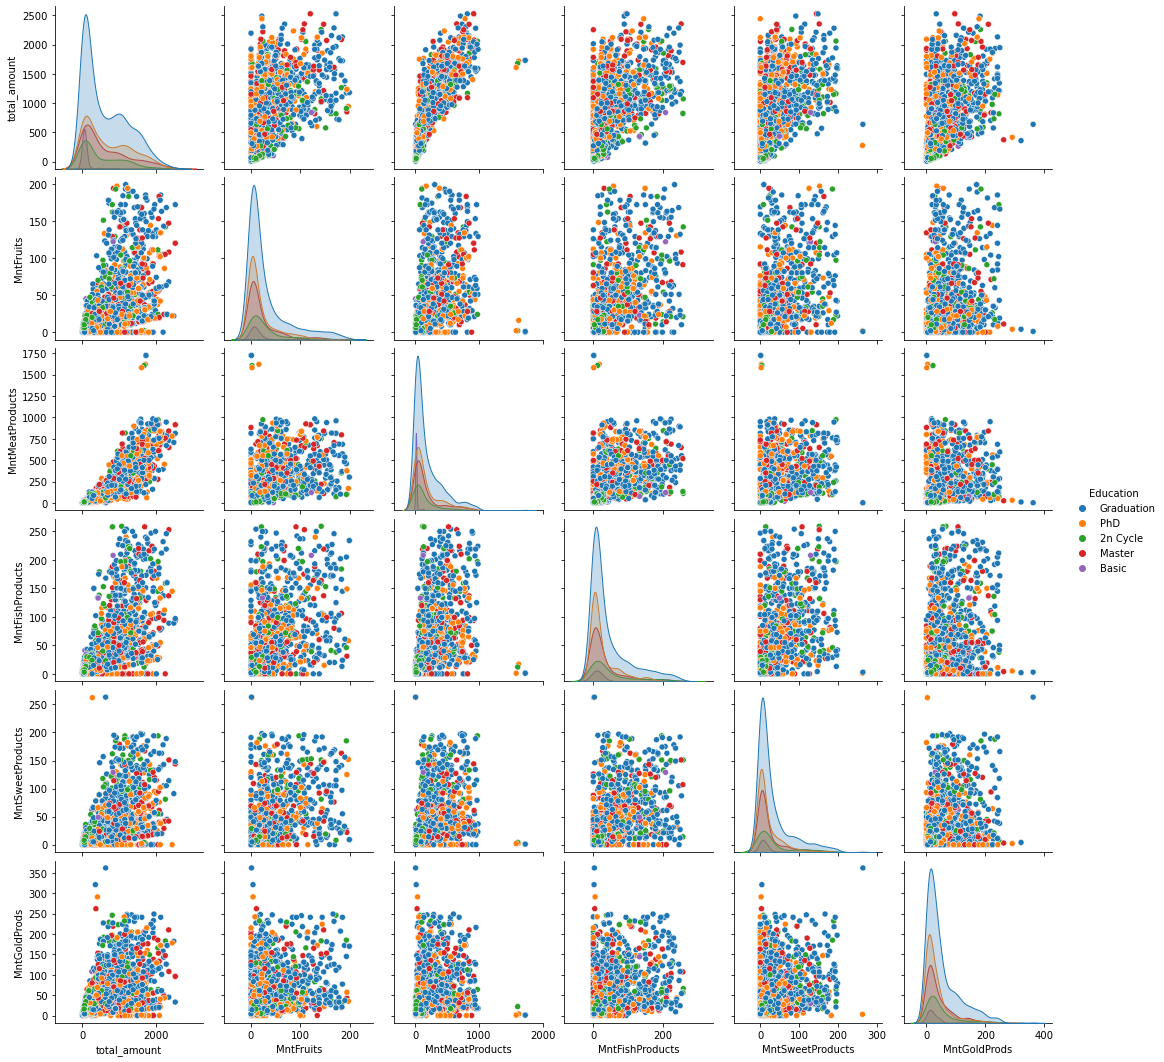

In [49]:
#Plotting a pairplot with the features 'total_amount', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts' and, 'MntGoldProds' in x-axis and y-axis
#with hue as Education
sns.pairplot(df, hue='Education', vars=['total_amount','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'])


**Key Observation from the above pairplot**

- Customers whose education background is Graduation have spent more amount of money

- **Plot a pairplot with hue as Marital Status**

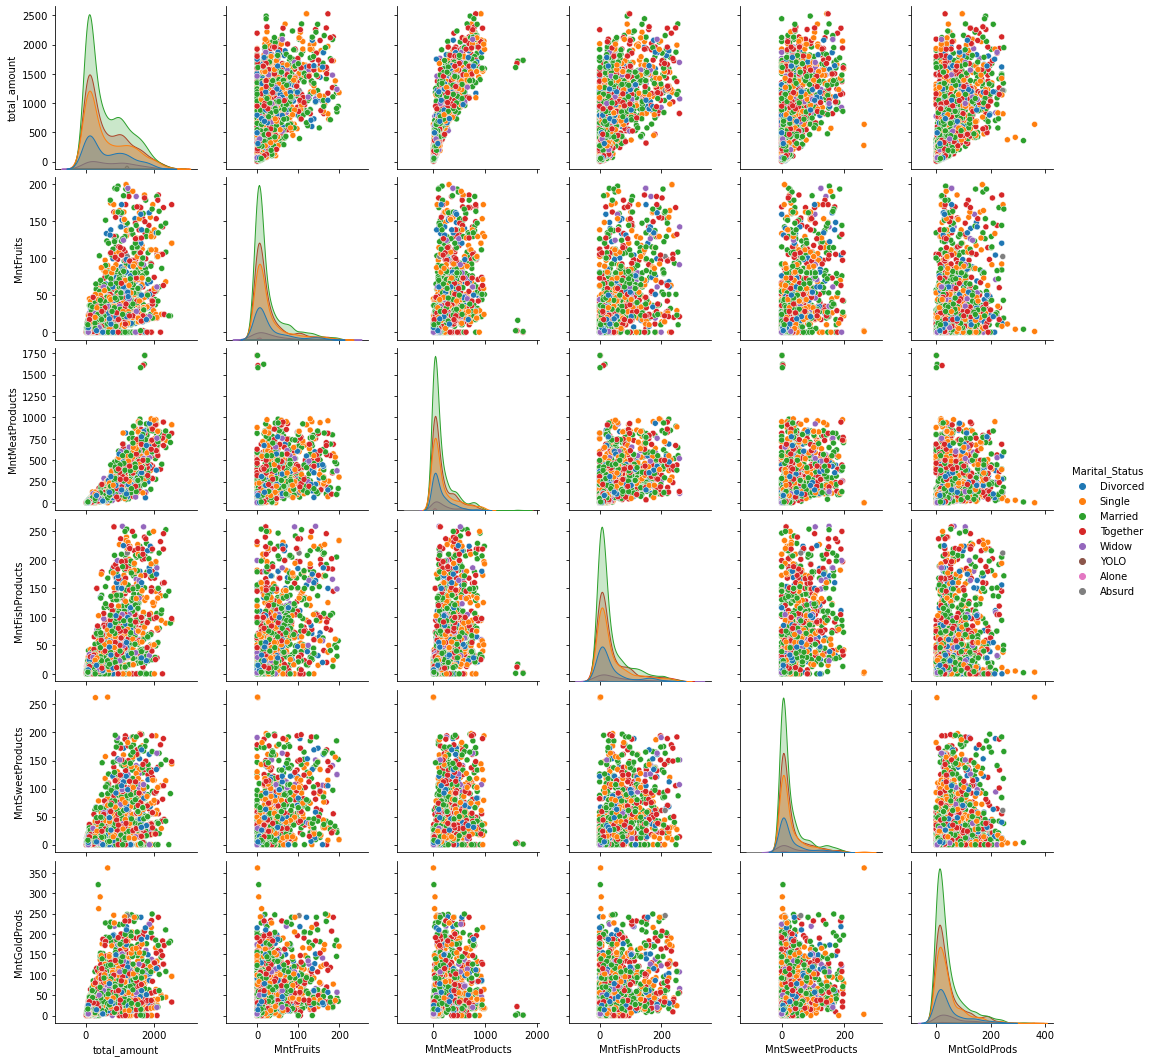

In [50]:
#Plotting a pairplot with the features 'total_amount', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts' and, 'MntGoldProds' in x-axis and y-axis
#with hue as Marital Status
sns.pairplot(df, hue='Marital_Status', vars=['total_amount','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'])


**Key Observation from the above pairplot**

- Customers who are married have spent more amount of money

 **Key Observations from the above 3 pairplots:**

- Total amount spent , Amount spent on Fruits , Meat , Fish , Sweet and Gold have right skewed distribution for all the three hues